In [2]:
from nltk.collocations import TrigramCollocationFinder
from IdiomModel import *
from functions import *
import nltk
import pandas as pd

nltk.download('punkt')

model = Id_identifier()
tr = ["deu", "eng", "fra", "ita", "nld", "spa"]
for idiom in tr:
    # Open files: file
    with open(f'./Data/{idiom}_trn.txt', 'r', encoding = 'UTF-8') as content_file:
        content = content_file.read()

    a = nltk.sent_tokenize(content)

    finder_tr = TrigramCollocationFinder.from_words(separation(a[0:30001]))
    finder_tr.apply_freq_filter(5)

    list_of_trigrams_tr = [tr for tr in finder_tr.ngram_fd.items()]
    model.add_train(list_of_trigrams_tr, idiom)
test = tr
for i_test in test:
    test = f'./Data/{i_test}_tst.txt'
    with open(test, 'r', encoding = 'UTF-8') as content_file:
        content = content_file.read()

    a = nltk.sent_tokenize(content)

    text = separation (a[0:10001])

    model.add_test(nltk.sent_tokenize(text), i_test, test)



model.calculate_metric()
results = model.results()
print(results)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'./Data/deu_tst.txt': ({'deu': 10029, 'eng': 20, 'fra': 10, 'ita': 30, 'nld': 22, 'spa': 61}, 'deu'), './Data/eng_tst.txt': ({'deu': 8, 'eng': 10095, 'fra': 22, 'ita': 5, 'nld': 13, 'spa': 35}, 'eng'), './Data/fra_tst.txt': ({'deu': 4, 'eng': 9, 'fra': 10066, 'ita': 3, 'nld': 5, 'spa': 8}, 'fra'), './Data/ita_tst.txt': ({'deu': 3, 'eng': 17, 'fra': 5, 'ita': 10142, 'nld': 9, 'spa': 23}, 'ita'), './Data/nld_tst.txt': ({'deu': 26, 'eng': 33, 'fra': 7, 'ita': 7, 'nld': 10013, 'spa': 23}, 'nld'), './Data/spa_tst.txt': ({'deu': 4, 'eng': 16, 'fra': 4, 'ita': 17, 'nld': 8, 'spa': 10314}, 'spa')}


In [3]:
data = {'y_true': [],
        'y_predicted': []}
true_values = 0
all_data = 0
for x in results:
    for y in results[x][0]:
        if y == results[x][1]:
            true_values += results[x][0][y]
        all_data += results[x][0][y]
        for _ in range(results[x][0][y]):
            data['y_true'] += [results[x][1]]
            data['y_predicted'] += [y]

df = pd.DataFrame(data)
cm = pd.crosstab(df['y_true'], df['y_predicted'], rownames=['Predict'], colnames = ['True'])
print(cm)

print("Acc: ", true_values / all_data)

True       deu    eng    fra    ita    nld    spa
Predict                                          
deu      10029     20     10     30     22     61
eng          8  10095     22      5     13     35
fra          4      9  10066      3      5      8
ita          3     17      5  10142      9     23
nld         26     33      7      7  10013     23
spa          4     16      4     17      8  10314
Acc:  0.9925224163885071


<AxesSubplot: xlabel='True', ylabel='Predict'>

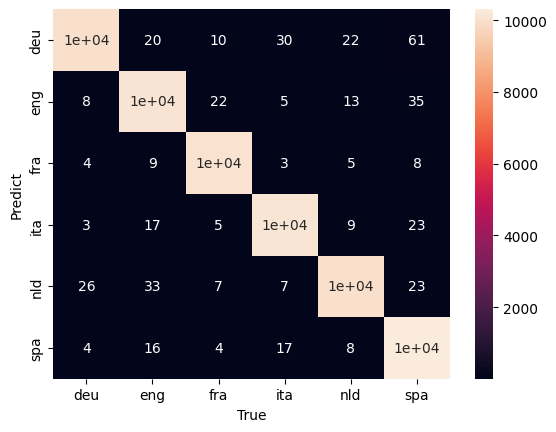

In [4]:
import seaborn as sns

sns.heatmap(pd.crosstab(df['y_true'], df['y_predicted'], rownames=['Predict'], colnames = ['True']), annot=True)

In [6]:
import numpy as np
corr = pd.crosstab(df['y_true'], df['y_predicted'], rownames=['Predict'], colnames = ['True']).corr()
corr.style.background_gradient(cmap='coolwarm')

True,deu,eng,fra,ita,nld,spa
True,,,,,,
deu,1.000000,-0.199996,-0.200550,-0.198633,-0.196691,-0.196979
eng,-0.199996,1.000000,-0.199711,-0.201114,-0.198139,-0.199770
fra,-0.200550,-0.199711,1.000000,-0.201663,-0.201077,-0.203232
ita,-0.198633,-0.201114,-0.201663,1.000000,-0.200924,-0.200261
nld,-0.196691,-0.198139,-0.201077,-0.200924,1.000000,-0.201217
spa,-0.196979,-0.199770,-0.203232,-0.200261,-0.201217,1.000000
